In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample




In [ ]:
df = pd.read_csv('final_data.csv')


In [ ]:
df.head()

,Unnamed: 0,Reviews,Token_Vector,Rating,Neg_Token_Vector,Final
0,52,it hums crackles and i think im having problem...,413234,1,566754,Neg
1,89,im a procheapo and i hated this thing theyre n...,346160,1,712708,Neg
2,223,received it in time standard blister packaging...,20636,1,712708,Neg
3,224,these things are terrible one wouldnt fit in m...,346160,1,886937,Neg
4,408,this is a cheap piece of junk that does what i...,369805,1,712708,Neg


In [ ]:
df['Final'].value_counts()

Pos    9022
Neu     772
Neg     467
Name: Final, dtype: int64

## Balance Dataset

In [ ]:
X = df.iloc[:,[2,4]]
T = df.iloc[:,5]

In [ ]:
X

,Token_Vector,Neg_Token_Vector
0,413234,566754
1,346160,712708
2,20636,712708
3,346160,886937
4,369805,712708
...,...,...
10256,563117,745810
10257,563117,712708
10258,413234,972789
10259,667333,712708


In [ ]:
T

0        Neg
1        Neg
2        Neg
3        Neg
4        Neg
        ... 
10256    Pos
10257    Pos
10258    Pos
10259    Pos
10260    Pos
Name: Final, Length: 10261, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, T, test_size=0.2, random_state=10)

In [ ]:
clf = Pipeline([('scaler', StandardScaler()), 
                ('classifier', SVC(kernel='rbf', tol=1e-3, random_state=0))])
        
clf.fit(X_train, t_train)
y_train = clf.predict(X_train)
y_test = clf.predict(X_test)

train_score = clf.score(X_train, t_train)
test_score = clf.score(X_test, t_test)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))


Train Accuracy: 0.88182261208577, Test Accuracy: 0.8689722357525572


In [ ]:
#y_test = clf.predict(X_test)


In [ ]:
print(classification_report(t_test, y_test, target_names=df['Final'].unique()))

              precision    recall  f1-score   support

         Neg       0.00      0.00      0.00       102
         Neu       0.00      0.00      0.00       167
         Pos       0.87      1.00      0.93      1784

    accuracy                           0.87      2053
   macro avg       0.29      0.33      0.31      2053
weighted avg       0.76      0.87      0.81      2053



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


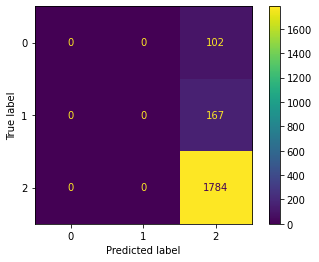

In [ ]:
cm = confusion_matrix(t_test, y_test)
cm_display = ConfusionMatrixDisplay(cm).plot()

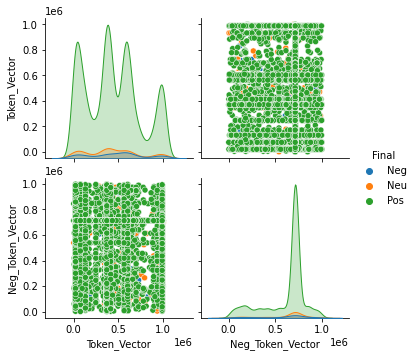

In [ ]:
import seaborn as sns
df=df.drop(columns=['Unnamed: 0', 'Rating'])

sns.pairplot(df, hue = 'Final')

## Resample Dataset

In [ ]:
df_majority = df[df.Final=='pos']

In [ ]:
df_majority

,Reviews,Token_Vector,Neg_Token_Vector,Final


In [ ]:
df_majority = df[df.Final=='Pos']
df_neu = df[df.Final=='Neu']
df_neg = df[df.Final=='Neg']
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=800,     # to match minority class
                                 random_state=123)

In [ ]:
# Combine majority class with upsampled minority class
df_downsampled = pd.concat([df_majority_downsampled, df_neu, df_neg])
 
# Display new class counts
df_downsampled.Final.value_counts()

Pos    800
Neu    772
Neg    467
Name: Final, dtype: int64

In [ ]:
df_downsampled

,Reviews,Token_Vector,Neg_Token_Vector,Final
8790,as a guitar player i recently march 2013 start...,616806,712708,Pos
2023,good quality for my casual use i wouldnt use ...,842163,419405,Pos
4841,this is one of the best mics in this price ran...,563117,703128,Pos
6214,this is one of the cleanest sounding miniamps ...,987913,712708,Pos
4295,i have bought and used about every banjo strap...,602996,712708,Pos
...,...,...,...,...
462,the tascam th2000 headphones are like putting ...,369805,371441,Neg
463,the larger ones sometimes have the neck snap s...,130977,87871,Neg
464,the tension screw adjustment remains the best ...,369805,206386,Neg
465,i am a fan of planet waves ns capos but this n...,602996,727769,Neg


In [ ]:
X = df_downsampled.iloc[:,[1,2]]
T = df_downsampled.iloc[:,3]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, T, test_size=0.2, random_state=10)

In [ ]:
clf = Pipeline([('scaler', StandardScaler()), 
                ('classifier', SVC(kernel='rbf', tol=1e-3, random_state=0, class_weight='balanced'))])
        
clf.fit(X_train, t_train)
y_train = clf.predict(X_train)
y_test = clf.predict(X_test)

train_score = clf.score(X_train, t_train)
test_score = clf.score(X_test, t_test)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))


Train Accuracy: 0.36909871244635195, Test Accuracy: 0.35294117647058826


In [ ]:
print(classification_report(t_test, y_test, target_names=df['Final'].unique()))

              precision    recall  f1-score   support

         Neg       0.23      0.52      0.32        88
         Neu       0.46      0.27      0.34       152
         Pos       0.47      0.34      0.40       168

    accuracy                           0.35       408
   macro avg       0.39      0.38      0.35       408
weighted avg       0.42      0.35      0.36       408



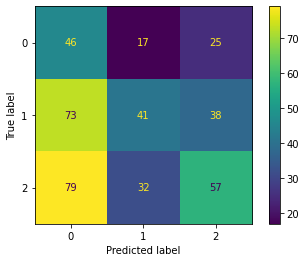

In [ ]:
cm = confusion_matrix(t_test, y_test)
cm_display = ConfusionMatrixDisplay(cm).plot()